<a href="https://colab.research.google.com/gist/Conal97/e7cd2b191750b33aedd84149d9804831/deterministic-szr-and-sir-models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import Packages

import numpy as np
from scipy.integrate import odeint 
from matplotlib import pyplot as plt

**SZR Model**

The SZR model is a simple model of a zombie infection and takes the form of a system of coupled differential equations. 'S' describes the suscpetible population, i.e. uninfected humans; 'Z' describes the zombie infected state; 'R' describes the removed state - zombies that have been killed by humans. 

In [0]:
# Definining a function using the ODE's given in paper

def SZR(x,tau):

  #Defining parameters 

  beta = 1 # the bite parameter (how likely a zombie is to bite and convert a human)
  kappa = 0.6 # the kill parameter (probability that a human will kill a zombie)
  alpha = kappa/beta #dimensionless virulence


  S = x[0] # susceptibles
  Z = x[1] # zombies
  N = 200 #population

  #ODE's

  dSdTau = - (S * Z) / N 
  dZdTau = (1 - alpha) * ((S * Z) / N ) 
  dRdTau = alpha * ((S * Z) / N )  

  return [dSdTau, dZdTau, dRdTau]

In [0]:
# Define initial conditions and run the simulation

x0 = [199, 1, 0]
tau = np.linspace(0, 30, 1000)
x = odeint(SZR, x0, tau)

S = x[:, 0]
Z = x[:, 1]
R = x[:, 2]

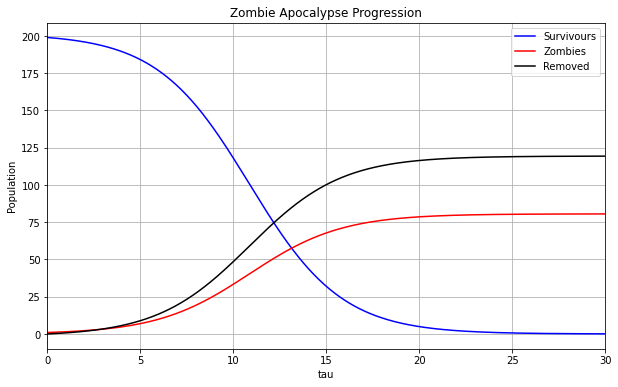

In [6]:
# Plotting results of SZR

plt.figure(figsize = [10, 6])

plt.plot(tau, S, "b", label = "Survivours")
plt.plot(tau, Z, "r", label = "Zombies")
plt.plot(tau, R, "k", label = "Removed")
plt.title("Zombie Apocalypse Progression")
plt.xlabel("tau")
plt.ylabel("Population")
plt.legend()
plt.grid()
plt.xlim(0,30)
plt.show()

In [0]:
# Definining a function where humans win

def SZRW(x,tau):

  #Defining parameters 

  beta = 1 # the bite parameter (how likely a zombie is to bite and convert a human)
  kappa = 1.1 # the kill parameter (probability that a human will kill a zombie)
  alpha = kappa/beta #dimensionless virulence


  S = x[0] # susceptibles
  Z = x[1] # zombies
  N = 200 #population

  #ODE's

  dSdTau = - (S * Z) / N 
  dZdTau = (1 - alpha) * ((S * Z) / N ) 
  dRdTau = alpha * ((S * Z) / N )  

  return [dSdTau, dZdTau, dRdTau]

In [0]:
# Define initial conditions and run the simulation

x0 = [199, 1, 0]
tau = np.linspace(0, 30, 1000)
x = odeint(SZRW, x0, tau)

SW = x[:, 0]
ZW = x[:, 1]
RW = x[:, 2]

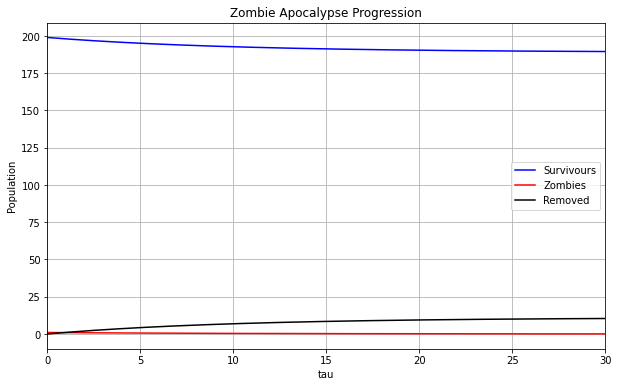

In [9]:
# Plotting results of SZRW

plt.figure(figsize = [10, 6])

plt.plot(tau, SW, "b", label = "Survivours")
plt.plot(tau, ZW, "r", label = "Zombies")
plt.plot(tau, RW, "k", label = "Removed")
plt.title("Zombie Apocalypse Progression")
plt.xlabel("tau")
plt.ylabel("Population")
plt.legend()
plt.grid()
plt.xlim(0,30)
plt.show()


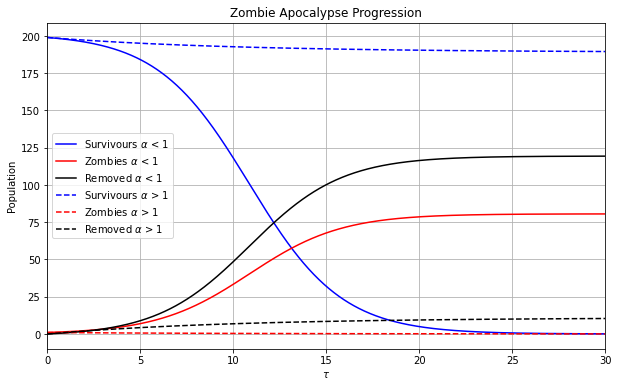

In [10]:
#plotting results of varying alpha
plt.figure(figsize = [10, 6])

plt.plot(tau, S, "b", label = "Survivours $\\alpha$ < 1")
plt.plot(tau, Z, "r", label = "Zombies $\\alpha$ < 1")
plt.plot(tau, R, "k", label = "Removed $\\alpha$ < 1")
plt.plot(tau, SW, "--" "b", label = "Survivours $\\alpha$ > 1")
plt.plot(tau, ZW, "--" "r" , label = "Zombies $\\alpha$ > 1")
plt.plot(tau, RW, "--" "k", label = "Removed $\\alpha$ > 1")
plt.title("Zombie Apocalypse Progression")
plt.xlabel("$\\tau$")
plt.ylabel("Population")
plt.legend()
plt.grid()
plt.xlim(0,30)



plt.show()



**SIR Model**

SIR is used in the modelling of diseases, we can use it as a comparison to the SZR model

In [0]:
# Definining a function using the ODE's given in paper#

def SIR(x,tau):

  #Defining parameters 

  mu = 0.6 #dimensionless virulence

  S2 = x[0] # susceptibles
  I = x[1] # zombies
  N2 = 200 #population

  #ODE's

  dS2dTau = - (S2 * I) / N2 
  dIdTau = ((S2/N2) - mu) * I 
  dR2dTau = mu * I

  return [dS2dTau, dIdTau, dR2dTau]


In [0]:
# Define initial conditions and run the simulation

x0 = [199, 1, 0]
tau = np.linspace(0, 30, 1000)
x = odeint(SIR, x0, tau)

S2 = x[:, 0]
I = x[:, 1]
R2 = x[:, 2]

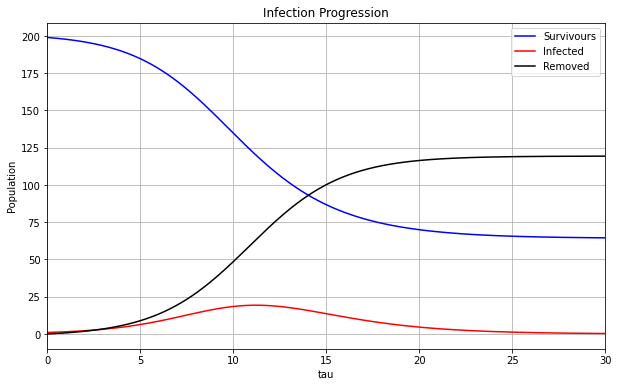

In [13]:
# Plotting results of SIR

plt.figure(figsize = [10, 6])

plt.plot(tau, S2, "b", label = "Survivours")
plt.plot(tau, I, "r", label = "Infected")
plt.plot(tau, R, "k", label = "Removed")
plt.title("Infection Progression")
plt.xlabel("tau")
plt.ylabel("Population")
plt.legend()
plt.grid()
plt.xlim(0,30)
plt.show()

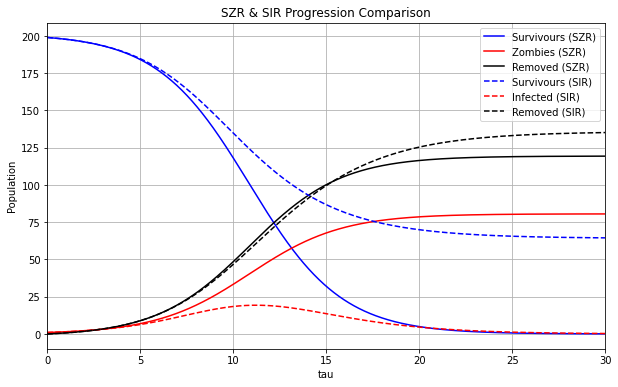

In [14]:
# Plotting Results of both SZR and SIR


plt.figure(figsize = [10, 6])

plt.plot(tau, S, "b", label = "Survivours (SZR)")
plt.plot(tau, Z, "r", label = "Zombies (SZR)")
plt.plot(tau, R, "k", label = "Removed (SZR)")

plt.plot(tau, S2, "--" "b", label = "Survivours (SIR)")
plt.plot(tau, I,  "--" "r", label = "Infected (SIR)")
plt.plot(tau, R2, "--" "k", label = "Removed (SIR)")

plt.title("SZR & SIR Progression Comparison")
plt.xlabel("tau")
plt.ylabel("Population")
plt.legend()
plt.grid()
plt.xlim(0,30)
plt.show()